## Integration and Interpolation

Here we will first see how we can integrate a function, and then define an interpolating function so that we can calculate the integral once, and then use the result very fast to acheive fast calculations. 

QuadGK is an extensive package for 1D integrations: https://juliamath.github.io/QuadGK.jl/stable/ there are other pakcages such has HCubature.jl and Cubature.jl .

In [2]:
using QuadGK, Plots

Lets start with a simple integral. Note that we can integrate to $\infty$, and that the result includes an error estimate. 

In [6]:
quadgk(x -> 2exp(-x^2)/√π, 0, Inf)

(1.0, 9.698570786851905e-9)

Now let's see why generating a new function from interpolation can be useful. 

Let us define another function, which uses integration in it.

In [38]:
function myerf(x,σ)
    ϵ=1e-5
    quadgk(t -> sqrt(2)*exp(-t^2/(2*(σ+ϵ)))/sqrt(π*(σ+ϵ)), 0, x)[1]
end

myerf (generic function with 1 method)

In [68]:
xrng = -3:0.005:3
σrng = 0.:0.005:4
@time f = [ myerf(x,σ) for σ ∈ σrng, x ∈ xrng];

  0.202558 seconds (209.98 k allocations: 40.835 MiB, 4.80% gc time, 10.77% compilation time)


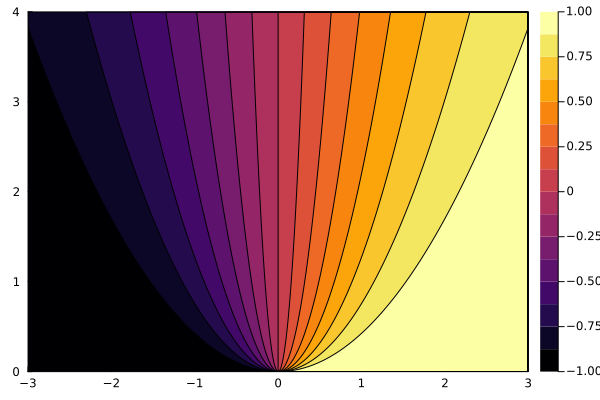

In [69]:
contourf(xrng, σrng, f)

There are several interpolation packages: http://juliamath.github.io/Interpolations.jl/stable/other_packages/

We'll use Dierckx.jl which is good for 1D and 2D splines. It is a wrapper to a very efficent library (written in Fortran)

In [42]:
using Dierckx

In [70]:
myerfspline = Spline2D(xrng, σrng, [ myerf(x,σ) for x ∈ xrng, σ ∈ σrng])

Spline2D([-3.0, -3.0, -3.0, -3.0, -2.99, -2.985, -2.98, -2.975, -2.97, -2.965  …  2.965, 2.97, 2.975, 2.98, 2.985, 2.99, 3.0, 3.0, 3.0, 3.0], [0.0, 0.0, 0.0, 0.0, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035  …  3.965, 3.97, 3.975, 3.98, 3.985, 3.99, 4.0, 4.0, 4.0, 4.0], [-1.0, -0.9999999999999991, -1.0000000000000009, -0.9999999999999998, -1.0000000000000002, -1.0000000000000004, -1.0000000000000004, -1.0000000000000007, -1.0, -1.0000000000000002  …  0.8604582592598947, 0.8611266710482395, 0.8617926142849178, 0.862456093939931, 0.8631171149956256, 0.8637756824465783, 0.8644318012993806, 0.8653033683305789, 0.8659533857794517, 0.866385111771528], 3, 3, 0.0)

In [71]:
@time fspline = [ myerfspline(x,σ) for σ ∈ σrng, x ∈ xrng];

  0.584234 seconds (3.89 M allocations: 171.942 MiB, 4.23% gc time, 5.21% compilation time)


It is actually longer than the integration! Perhaps it is because of the overhead of the wrapper (maybe anothero package will be faster). However, Dierckx is very efficient when operating on a grid directly. 

In [72]:
@time fspline = evalgrid(myerfspline, xrng, σrng);

  0.009893 seconds (7 allocations: 7.424 MiB)


In [67]:
length(xrng)*length(σrng)

721801